In [1]:
print("""
@Title: 规范性金融理论
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-09-17 11:16:31
@Description: 
""")


@Title: 规范性金融理论
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-09-17 11:16:31
@Description: 



# 不确定性与风险

In [2]:
import numpy as np

In [3]:
S0 = 10
B0 = 10

In [4]:
S1 = np.array((20, 5))
B1 = np.array((11, 11))

In [5]:
M0 = np.array((S0, B0))
M0

array([10, 10])

In [6]:
M1 = np.array((S1, B1)).T
M1

array([[20, 11],
       [ 5, 11]])

In [7]:
K = 14.5

In [8]:
C1 = np.maximum(S1 - K, 0)
C1

array([5.5, 0. ])

In [9]:
# 复制投资组合
phi = np.linalg.solve(M1, C1)
phi

array([ 0.36666667, -0.16666667])

In [10]:
np.allclose(C1, np.dot(M1, phi))

True

In [11]:
np.dot(M1, phi)

array([5.5, 0. ])

In [12]:
C0 = np.dot(M0, phi)
# 期权的无套利价格
C0

2.0

借助股票和债券的组合来复制期权 $\phi$ 的无套利欧式看涨期权

# 预期效用理论

In [13]:
def u(x):
    return np.sqrt(x)

In [14]:
phi_A = np.array((.75, .25))
phi_D = np.array((.25, .75))

In [15]:
np.dot(M0, phi_A) == np.dot(M0, phi_D)

True

In [16]:
A1 = np.dot(M1, phi_A)
A1

array([17.75,  6.5 ])

In [17]:
D1 = np.dot(M1, phi_D)
D1

array([13.25,  9.5 ])

In [18]:
P = np.array((.5, .5))

In [19]:
def EUT(x):
    return np.dot(P, u(x))

In [20]:
EUT(A1)

3.381292321692286

In [21]:
EUT(D1)

3.3611309730623735

In [22]:
from scipy.optimize import minimize

In [23]:
w = 10

In [24]:
cons = {'type': 'eq', 
        'fun': lambda phi: np.dot(M0, phi) - w}

In [25]:
def EUT_(phi):
    x = np.dot(M1, phi)
    return EUT(x)

In [26]:
opt = minimize(lambda phi: -EUT_(phi),
               x0=phi_A,
               constraints=cons)

In [27]:
opt

     fun: -3.385015999493397
     jac: array([-1.69249132, -1.69253424])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.61122474, 0.38877526])

In [28]:
EUT_(opt['x'])

3.385015999493397

# 均值-方差投资组合理论

In [29]:
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [30]:
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [31]:
def mu(rX):
    return np.dot(P, rX)

In [32]:
mu(rS)

0.25

In [33]:
mu(rB)

0.10000000000000009

In [34]:
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [35]:
mu(rM)

array([0.25, 0.1 ])

In [36]:
def var(rX):
    return ((rX - mu(rX)) ** 2).mean()

In [37]:
var(rS)

0.5625

In [38]:
var(rB)

0.0

In [39]:
def sigma(rX):
    return np.sqrt(var(rX))

In [40]:
sigma(rS)

0.75

In [41]:
sigma(rB)

0.0

In [42]:
np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [43]:
phi = np.array((.5, .5))
phi

array([0.5, 0.5])

In [44]:
def mu_phi(phi):
    return np.dot(phi, mu(rM))

In [45]:
mu_phi(phi)

0.17500000000000004

In [46]:
def var_phi(phi):
    cv = np.cov(rM.T, aweights=P, ddof=0)
    return np.dot(phi, np.dot(cv, phi))

In [47]:
var_phi(rM)

array([[ 0.5625  ,  0.05625 ],
       [-0.28125 , -0.028125]])

In [48]:
def sigma_phi(phi):
    return var_phi(phi) ** .5

In [49]:
sigma_phi(phi)

0.375

### 投资机会集

In [50]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'

In [51]:
phi_mcs = np.random.random((2, 200))

In [52]:
phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

In [53]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

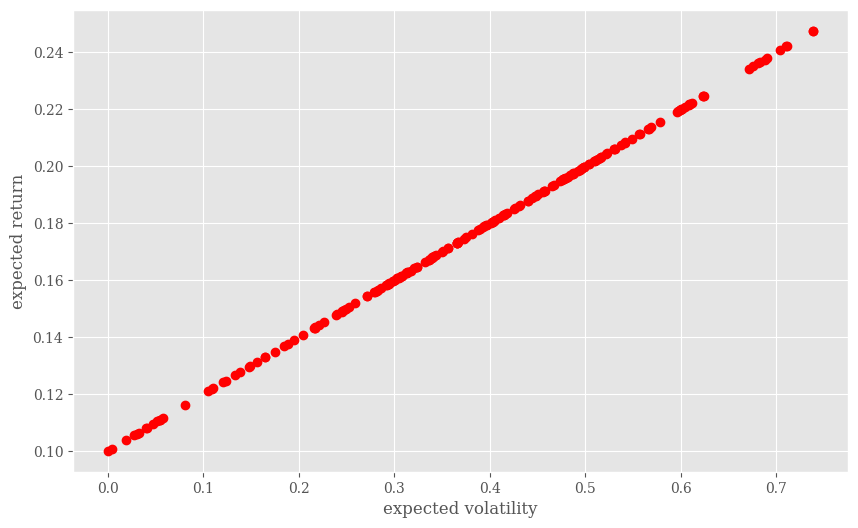

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [55]:
P = np.ones(3) / 3
P

array([0.33333333, 0.33333333, 0.33333333])

In [56]:
S0 = 10
S1 = np.array((20, 10, 5))

In [57]:
T0 = 10
T1 = np.array((1, 12, 13))

In [58]:
M0 = np.array((S0, T0))
M0

array([10, 10])

In [59]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [60]:
rM = M1 / M0 - 1

In [61]:
mcs =  np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

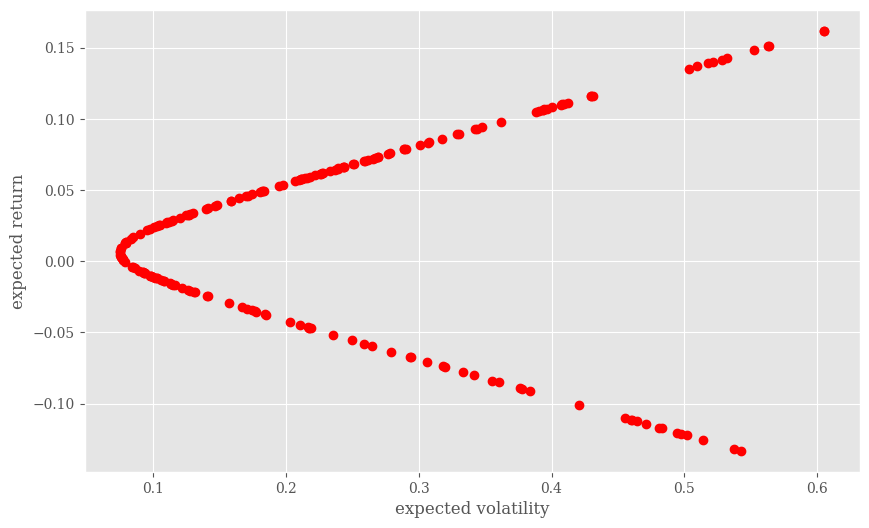

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

### 最小波动率和最大夏普比率

In [63]:
cons = {"type": 'eq',
        "fun": lambda phi: np.sum(phi) - 1}

In [64]:
bnds = ((0, 1), (0, 1))

In [65]:
min_var = minimize(sigma_phi, (.5, .5),
                   constraints=cons,
                   bounds=bnds)

In [66]:
min_var

     fun: 0.07481322946903253
     jac: array([0.07426564, 0.07528946])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.46511697, 0.53488303])

In [67]:
def sharpe(phi):
    return mu_phi(phi) / sigma_phi(phi)

In [68]:
max_sharpe = minimize(lambda phi: -sharpe(phi), (.5, .5),
                      constraints=cons, bounds=bnds)

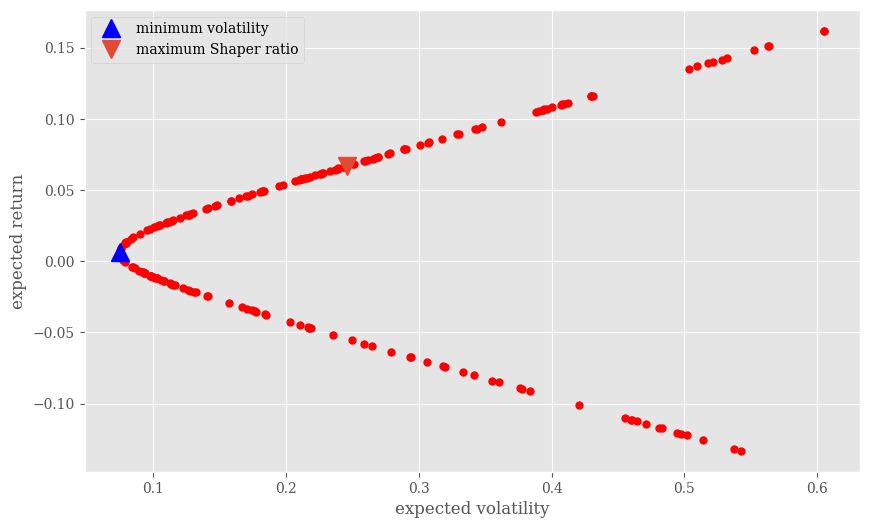

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         'b^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Shaper ratio')
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()
plt.show()

### 有效前沿

In [78]:
target = None
cons = [
    {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},
    {'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}
]

In [71]:
bnds = ((0, 1), (0, 1))

In [73]:
targets = np.linspace(mu_phi(min_var['x']), .16)

In [75]:
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (.5, .5),
                       constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

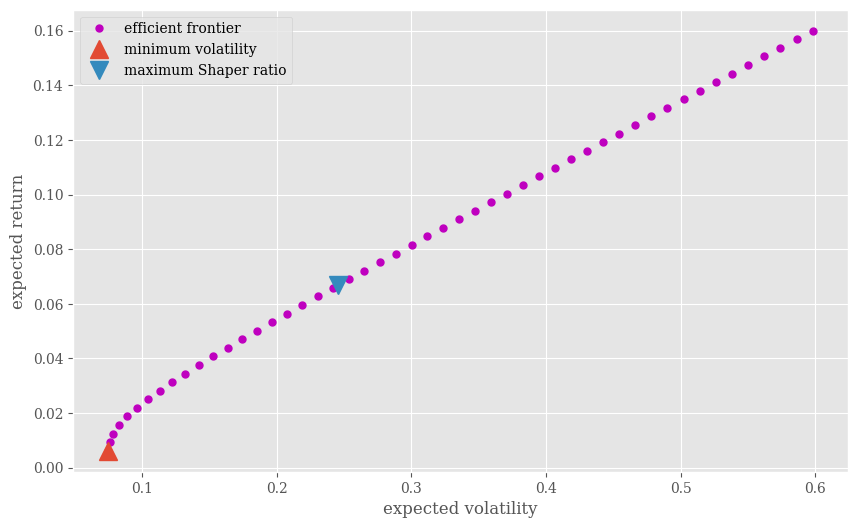

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,
         label="efficient frontier")
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
         '^', ms=12.5, label="minimum volatility")
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
         'v', ms=12.5, label='maximum Shaper ratio')
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.legend()
plt.show()